In [3]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [5]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load the data

In [6]:
pwd

'/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification'

In [9]:
!head -2 ../../FinalProject/hein-daily/sample/speeches_097.txt

speech_id|speech
970000001|The Senate vill please come to order. The Chaplain will offer the prayer. The Chaplain. the Reverend Edward L. R. Elson. D.D.. offered the following prayer: PRAYER God of our fathers and our God. who has made and preserved us a nation. we thank Thee for Thy care over us from generation to generation. and for the new era which unfolds before us. Let Thy spirit descend upon us with all Its cleansing. healing. and creative power. Make usnew persons for new times in a land newborn in spirit. May the solemn induction of the new Members of this body be a renewal of the vocatinal vows of all others. In the deliberations of this new Congress keep our motives pure. our vision clear. our patriotism undefiled. our speech chaste. our judgments fair. and our consciences unbetrayed. Help us to develop work patterns which sustain the soul. nourish the mind. and strengthen the will. And give us grace to make time for the family. for home. and for worship. What we pray for th

In [10]:
!cat ../../FinalProject/hein-daily/sample/speeches_097.txt | wc -l

  283399


In [11]:
data_path = '../../FinalProject/hein-daily/Sample'

In [12]:
reload(load_data)
all_speech_ids, all_speeches = load_data.load_speech_data(data_path)


File speeches_097.txt has 249718612 characters
and 283399 speeches

Speeches list has 283399 speeches


In [13]:
len(all_speech_ids), len(all_speeches)

(283399, 283399)

## Create target labels

#### TODO:

- Why is this taking so much time?
- Subset on word cound here?
- Make sampling replicable: random seed + random array of proper length

In [14]:
reload(load_data)
start_time = time.time()
# remove p if want to run for the full speech file
descr = load_data.load_descr_data('../data/QA/full_descr.txt')
print("\nIt took {0:.1f} seconds to create the dictionary".format(time.time()-start_time))

2914465 lines have been read
37617 keys had duplicates and deleted
The dictionary has 2808050 keys

Random congressperson: 1090182100
date 20061114
char_count 278
word_count 49
speakerid 109112991.0
Party R
Congress 109
Chamber S
State TN
Ethnicity W
Age 54.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. FRIST
Full Name FRIST, WILLIAM
match exact
check 1

It took 24.4 seconds to create the dictionary


In [15]:
# check if sampling worked
len(list(descr.keys()))/2914464

0.9634876258550458

In [16]:
gender, ethnicity, age, party, chamber, congress = load_data.create_target_labels(all_speech_ids, descr)
len(gender), len(ethnicity), len(age), len(party), len(chamber), len(congress)

(283399, 283399, 283399, 283399, 283399, 283399)

### Data QA

In [17]:
reload(explore_data)
for i in [(gender, "Gender"), (ethnicity, "Ethnicity"), (age, "Age")]:
    print("\n", i[1])
    print("Overall speech counts:")
    explore_data.get_counts(i[0])
    print("Target group number of speeches by party:")
    explore_data.get_counts_by_category(i[0], party)


 Gender
Overall speech counts:


,Category,Count
0,-1,64727
1,0,214221
2,1,4451


Target group number of speeches by party:
D: 	 2172
I: 	 0
N: 	 0
NA: 	 -64727
R: 	 2279

 Ethnicity
Overall speech counts:


,Category,Count
0,-1,64727
1,0,209473
2,1,9199


Target group number of speeches by party:
D: 	 7832
I: 	 0
N: 	 186
NA: 	 -64727
R: 	 1181

 Age
Overall speech counts:


,Category,Count
0,-1,64727
1,0,142904
2,1,75768


Target group number of speeches by party:
D: 	 40729
I: 	 0
N: 	 186
NA: 	 -64727
R: 	 34853


In [18]:
reload(explore_data)
explore_data.random_speech(all_speeches, all_speech_ids, gender, descr)

Speaker information
date 19810714
char_count 39
word_count 7
speakerid 97105780.0
Party D
Congress 97
Chamber H
State NY
Ethnicity B
Age 58.0
Age_lt_med 0.0
NonWhite 1.0
Female 1.0
speaker Mrs. CHISHOLM
Full Name CHISHOLM, SHIRLEY
match exact
check 1

I yield to the gentleman from Michigan.


In [19]:
explore_data.random_speech(all_speeches, all_speech_ids, ethnicity, descr)

Speaker information
date 19811005
char_count 789
word_count 151
speakerid 97106770.0
Party D
Congress 97
Chamber H
State TX
Ethnicity ME
Age 63.0
Age_lt_med 0.0
NonWhite 1.0
Female 0.0
speaker Mr. KAZEN
Full Name KAZEN, ABRAHAM
match exact
check 1

Mr. Chairman. let me just tell the gentleman that as far as that point Is concerned. there are some people living in this country who would deserve American citizenship to be granted by takh..g the exam in their own language. This House has at various times passed such a bill to exempt certain people from taking the exam in English. but the other body has killed that bill. Let me tell the gentleman. coming from where I come from in South Texas. that we have a lot of aliens who would make wonderful citizens. who have lived here all their lives. who have given sons in the service of this country. and who are glad to be here. And as one alien mother told me when I went to the funeral of a Vietnam service man "Estoy Argullosa I am proud to have 

In [20]:
explore_data.random_speech(all_speeches, all_speech_ids, age, descr)

Speaker information
date 19820616
char_count 125
word_count 22
speakerid 97110150.0
Party D
Congress 97
Chamber H
State SC
Ethnicity W
Age 46.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. DERRICK
Full Name DERRICK, BUTLER
match exact
check 1

Mr. Speaker. by di rection of the Committee on Rules. I call up House Resolution 503 and ask for its immediate consideration.


## Split into train, validate, test

### Filter on party if necessary

In [21]:
# reload(load_data)
# all_speeches_d, all_speech_ids_d, gender_d = load_data.filter_data(all_speeches, all_speech_ids, gender, party, 'D')
# len(all_speeches_d), len(all_speech_ids_d), len(gender_d)

In [22]:
# reload(explore_data)
# explore_data.get_counts(gender_d)

### Split into train/val/test

### Split by congress

In [23]:
# reload(preprocess_data)
# train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_by_congress(all_speeches, all_speech_ids, gender, descr, congress)

In [24]:
reload(preprocess_data)
train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_train_val_test(all_speeches, all_speech_ids, ethnicity, descr)

Training split: 3195 ones and 3195 zeroes
Training speech list size: 6390
Training target list size: 6390
Validation split: 1065 ones and 1065 zeroes
Validation speech list size: 2130
Validation target list size: 2130
Test split: 1066 ones and 1066 zeroes
Test speech list size: 2132
Test target list size: 2132


In [25]:
sum(train_target), sum(val_target), sum(test_target)

(3195, 1065, 1066)

In [26]:
# number of speeches under 30 words
sum(np.array(ethnicity)==1) - (sum(train_target) + sum(val_target) + sum(test_target))

3873

In [27]:
explore_data.random_speech(train, train_ids, train_target, descr)

Speaker information
date 19820722
char_count 1094
word_count 176
speakerid 97104231.0
Party R
Congress 97
Chamber S
State CA
Ethnicity AAPIA
Age 76.0
Age_lt_med 0.0
NonWhite 1.0
Female 0.0
speaker Mr. HAYAKAWA
Full Name HAYAKAWA, SAMUEL
match exact
check 1

Mr. President. I ani offering this amendment. along with Senators CRANSTON. DAMATO. HAWKINS. and MURKOWSKI to correct a problem created by a requirement in this bill that will cost the State of California $4 million and will have a similar impact on many other States. Specifically. this amendment modifies the requirement that State and local governments notify during the month of January. taxpayers that any refund they may have received in the previous tax year is taxable as income to the Federal Government. Because the bill requires notification only during January. States will have to make a separate mailing to all taxpayers. at considerable cost. In mailing fees alone. this provision will cost California taxpayers. as I said befo

## EDA on train data

Source: https://developers.google.com/machine-learning/guides/text-classification/step-2

### Check median number of words per sample in train/val/test

In [28]:
reload(explore_data)

<module 'helpers.explore_data' from '/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification/helpers/explore_data.py'>

In [29]:
explore_data.get_num_words_per_sample(train)

207.0

In [30]:
explore_data.get_num_words_per_sample(val)

205.0

In [31]:
explore_data.get_num_words_per_sample(test)

186.5

Speech length percentiles
    0     10    20    30     40     50     60     70     80     90      100
0  31.0  43.0  63.0  98.0  149.0  207.0  279.4  373.0  524.0  827.0  6274.0


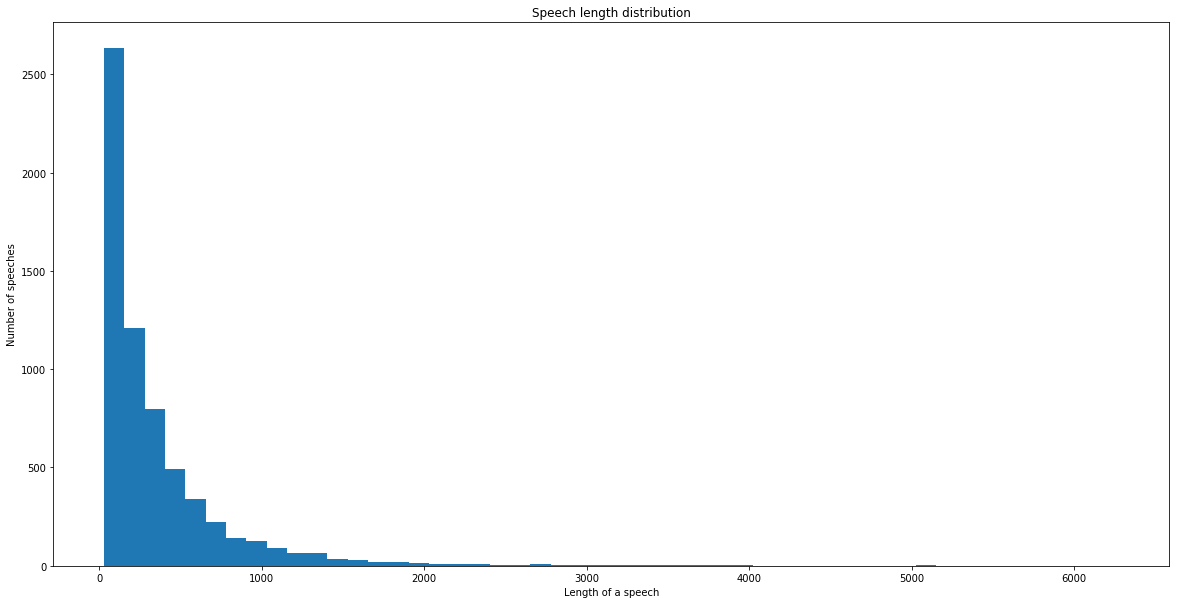

In [32]:
reload(explore_data)
explore_data.plot_sample_length_distribution(train)

### Most popular unigrams (training only)

In [33]:
train_sample = random.sample(train, int(len(train)*0.2))
len(train_sample)

1278

['the', 'of', 'to', 'and', 'in', 'that', 'is', 'for', 'this', 'it', 'we', 'be', 'on', 'have', 'as', 'not', 'are', 'by', 'with', 'will', 'has', 'mr', 'our', 'from', 'would', 'an', 'which', 'was', 'or', 'at', 'my', 'they', 'president', 'but', 'all', 'who', 'their', 'he', 'his', 'been', 'bill', 'these', 'if', 'do', 'there', 'more', 'its', 'one', 'committee', 'can']


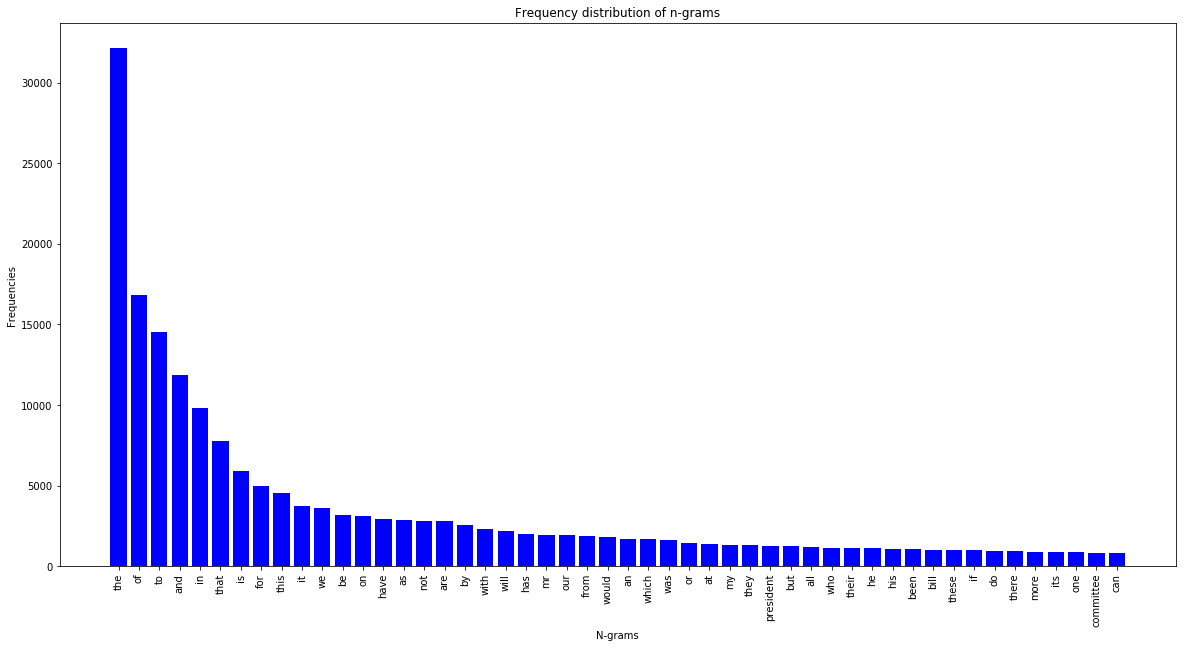

In [34]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(1,1))

### Most popular bigrams (training only)

['of the', 'in the', 'to the', 'it is', 'that the', 'for the', 'and the', 'on the', 'by the', 'to be', 'mr speaker', 'of this', 'with the', 'mr president', 'we are', 'we have', 'will be', 'that we', 'the united', 'united states', 'from the', 'in this', 'that is', 'has been', 'is the', 'of our', 'at the', 'the house', 'have been', 'do not', 'the gentleman', 'the senate', 'is not', 'would be', 'my colleagues', 'the federal', 'there is', 'the committee', 'as the', 'this is', 'the president', 'the bill', 'percent of', 'one of', 'this bill', 'mr chairman', 'that it', 'the congress', 'going to', 'fiscal year']


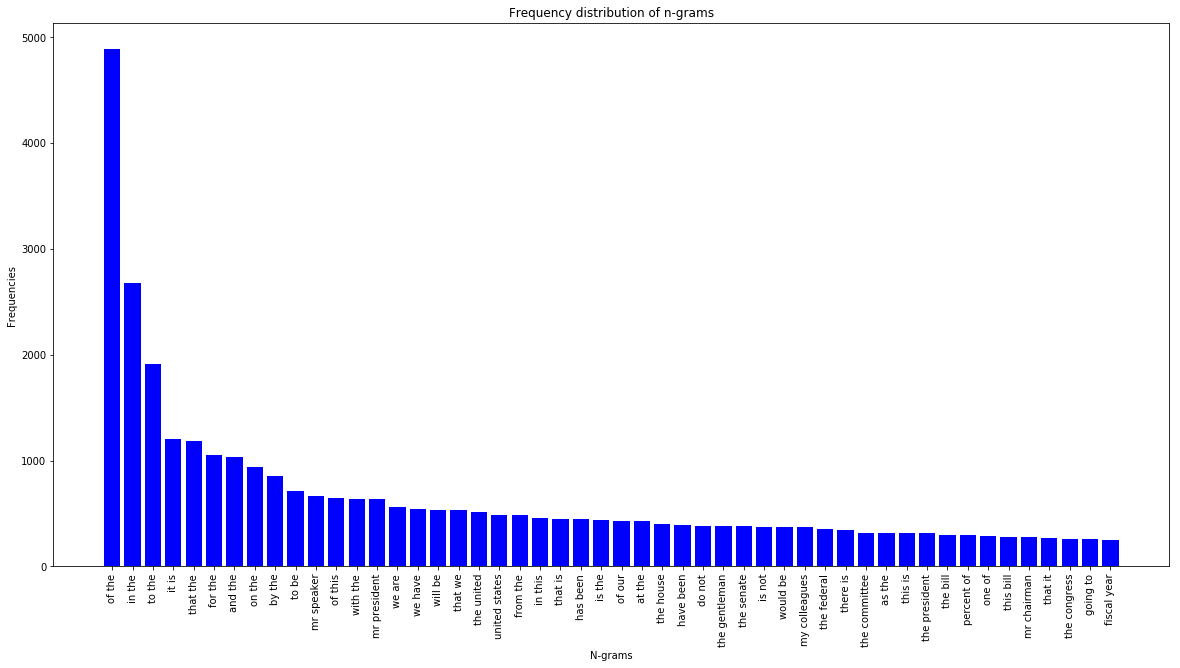

In [35]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(2,2))

### Most popular trigrams (training only)

['the united states', 'would like to', 'one of the', 'the gentleman from', 'the department of', 'of the united', 'percent of the', 'the federal government', 'chairman of the', 'ask unanimous consent', 'the senator from', 'in the record', 'unanimous consent that', 'the soviet union', 'the fact that', 'the committee on', 'in order to', 'members of the', 'in this country', 'that it is', 'my colleagues to', 'the american people', 'there is no', 'as well as', 'member of the', 'of the house', 'it is not', 'in the united', 'we do not', 'part of the', 'are going to', 'of my colleagues', 'urge my colleagues', 'that we are', 'that we have', 'printed in the', 'of the committee', 'it is the', 'be able to', 'of the federal', 'the state of', 'president of the', 'the people of', 'for fiscal year', 'the federal reserve', 'mr speaker the', 'in support of', 'with respect to', 'in the house', 'be printed in']


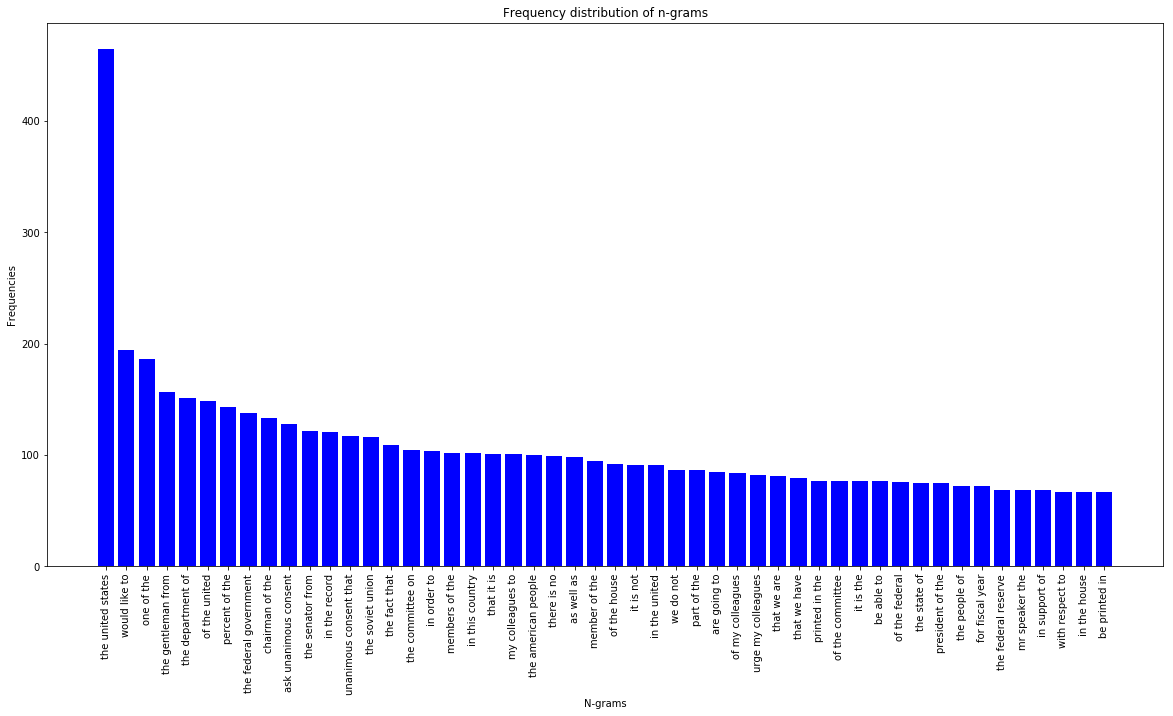

In [36]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(3,3))

In [37]:
congress = set([str(i) for i in range(97,115)])

In [38]:
len(train)

6390

In [39]:
descr['1110063404']

{'date': '20090930',
 'char_count': '1356',
 'word_count': '244',
 'speakerid': '111118281.0',
 'Party': 'R',
 'Congress': '111',
 'Chamber': 'S',
 'State': 'TN',
 'Ethnicity': 'W',
 'Age': '70.0',
 'Age_lt_med': '0.0',
 'NonWhite': '0.0',
 'Female': '0.0',
 'speaker': 'Mr. ALEXANDER',
 'Full Name': 'ALEXANDER, LAMAR',
 'match': 'exact',
 'check': 1}

In [40]:
reload(explore_data)
explore_data.ngrams_by_category(train, train_ids, descr, congress, 'Congress', p=0.3, top_n=5)


For Congress 97 top 5 (3, 3) ngrams are:
the united states
would like to
the gentleman from
one of the
of the united
--------------------


## N-gram model

Inspiration for code: https://developers.google.com/machine-learning/guides/text-classification/step-3

### Pre-processing

In [41]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Output number of top/bottom scoring ngrams
TOP_N = 5

vec_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [42]:
reload(preprocess_data)
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **vec_params)

Total vocabulary size: 66405
Number of stop words 623766

Top 5 ngrams by differentiating score:
mr president 	 315.0
senator 	 296.4
the senator 	 234.1
senator from 	 223.3
president 	 202.1

Bottom 5 ngrams by differentiating score:
museum of 	 0.0
stage for 	 0.0
here or 	 0.0
much from 	 0.0
at both 	 0.0


In [43]:
len(train), len(val), len(test)

(6390, 2130, 2132)

In [44]:
train_vec.shape, val_vec.shape, test_vec.shape

((6390, 20000), (2130, 20000), (2132, 20000))

### Saving processed files

In [45]:
pwd

'/Users/fariamardhani/Berkeley/W266/W266-Final-Project/Classification'

In [55]:
data_path = '/Users/fariamardhani/Berkeley/W266/FinalProject/saved_files'

In [56]:
scipy.sparse.save_npz(os.path.join(data_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(data_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(data_path, 'test_vec.npz'), test_vec)

In [57]:
train_vec = scipy.sparse.load_npz(os.path.join(data_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(data_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(data_path, 'test_vec.npz'))

In [58]:
train_vec.shape, val_vec.shape, test_vec.shape

((6390, 20000), (2130, 20000), (2132, 20000))

In [60]:
with open(os.path.join(data_path, 'train_list'), 'wb') as fp:
    pickle.dump(train, fp)
with open(os.path.join(data_path, 'train_ids'), 'wb') as fp:
    pickle.dump(train_ids, fp)
with open(os.path.join(data_path, 'train_target'), 'wb') as fp:
    pickle.dump(train_target, fp)
with open(os.path.join(data_path, 'val_list'), 'wb') as fp:
    pickle.dump(val, fp)
with open(os.path.join(data_path, 'val_ids'), 'wb') as fp:
    pickle.dump(val_ids, fp)
with open(os.path.join(data_path, 'val_target'), 'wb') as fp:
    pickle.dump(val_target, fp)
with open(os.path.join(data_path, 'test_list'), 'wb') as fp:
    pickle.dump(test, fp)
with open(os.path.join(data_path, 'test_ids'), 'wb') as fp:
    pickle.dump(test_ids, fp)
with open(os.path.join(data_path, 'test_target'), 'wb') as fp:
    pickle.dump(test_target, fp)

In [61]:
sum(train_target), sum(val_target), sum(test_target)

(3195, 1065, 1066)

In [62]:
with open(os.path.join(data_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(data_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(data_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)
with open(os.path.join(data_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(data_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(data_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)
with open(os.path.join(data_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(data_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(data_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [63]:
sum(train_target), sum(val_target), sum(test_target)

(3195, 1065, 1066)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [64]:
logs_base_dir = '/Users/fariamardhani/Berkeley/W266/FinalProject/logs'

In [65]:
ngram_model_params = {
    'model': 'ngram',
    'log_dir': logs_base_dir,
    'learning_rate': 1e-3,
    'epochs': 1000,
    'batch_size': 128,
    'layers': 2,
    'units': 64,
    'dropout_rate': 0.2
}

In [66]:
reload(train_model)
history, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), **ngram_model_params)

Train on 6390 samples, validate on 2130 samples
Epoch 1/1000
 - 8s - loss: 0.6580 - acc: 0.7038 - val_loss: 0.6368 - val_acc: 0.6723
Epoch 2/1000
 - 7s - loss: 0.5345 - acc: 0.8239 - val_loss: 0.5863 - val_acc: 0.6948
Epoch 3/1000
 - 7s - loss: 0.4208 - acc: 0.8814 - val_loss: 0.5603 - val_acc: 0.7000
Epoch 4/1000
 - 7s - loss: 0.3345 - acc: 0.9108 - val_loss: 0.5504 - val_acc: 0.7070
Epoch 5/1000
 - 7s - loss: 0.2668 - acc: 0.9362 - val_loss: 0.5469 - val_acc: 0.7141
Epoch 6/1000
 - 7s - loss: 0.2142 - acc: 0.9516 - val_loss: 0.5496 - val_acc: 0.7080
Epoch 7/1000
 - 7s - loss: 0.1777 - acc: 0.9642 - val_loss: 0.5551 - val_acc: 0.7056
Validation accuracy: 0.7056338034325362, loss: 0.5551263951919448


## Model evaluation

In [67]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

1503

Confusion matrix, without normalization
[[742 323]
 [304 761]]


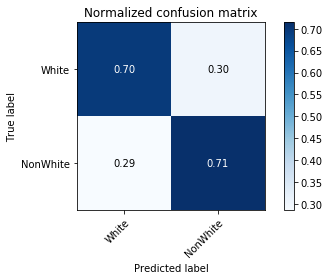

In [68]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['White', 'NonWhite']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

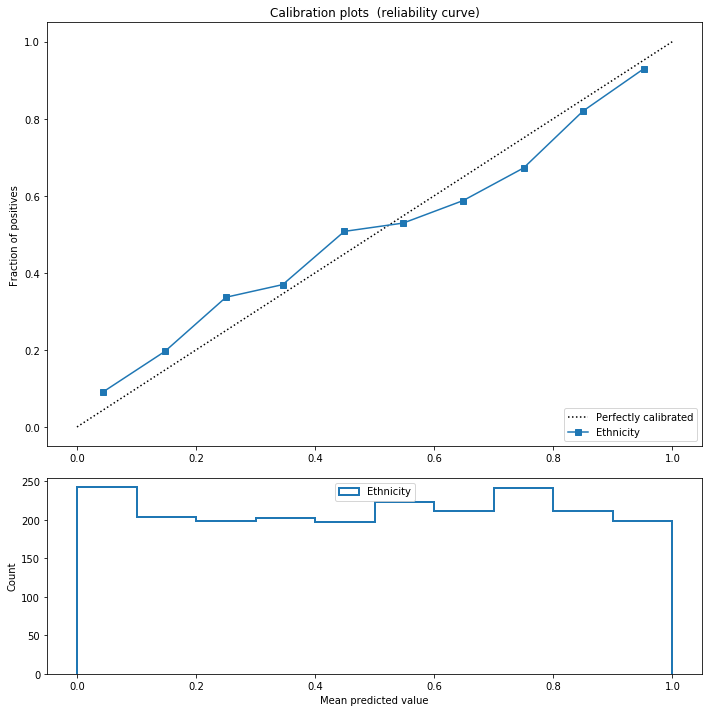

In [69]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Ethnicity')

In [70]:
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.7,0.3])
val_random.sum()/val_random.shape[0]

0.30985915492957744

In [71]:
val_sample, val_ids_sample, val_pred_probs_sample = [], [], []
for i in range(len(val_ids)):
    if val_random[i] == 1:
        val_sample.append(val[i])
        val_ids_sample.append(val_ids[i])
        val_pred_probs_sample.append(val_pred_probs[i])
len(val_sample), len(val_ids_sample), len(val_pred_probs_sample)

(660, 660, 660)

In [72]:
descr_df = pd.read_csv('../data/QA/full_descr.txt', sep="|", index_col=0)
descr_df.shape

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2914464, 16)

In [73]:
reload(explore_data)
explore_data.check_bin_probs_distr(val_pred_probs, val_ids, descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base  0.079474       0.087358  58.324787  0.520156   0.563685    232.456109


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.13,2.75,0.94,0.99,0.77,1.24
0.6,0.24,5.94,0.93,1.30,1.27,1.36
1.0,0.34,8.55,0.94,1.55,1.45,1.83


In [79]:
np.save('/Users/fariamardhani/Berkeley/W266/FinalProject/saved_files/val_pred_probs', val_pred_probs, allow_pickle=True, fix_imports=True)

In [127]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs)


Top 10 ngrams by differentiating score:
the senator from 	 11.6
our national security 	 10.4
the distinguished senator 	 10.2
the distinguished senator from 	 10.0
distinguished senator from 	 9.5
one of the 	 9.1
the soviet union 	 8.5
mr president ask 	 8.4
president ask unanimous 	 6.8
president ask unanimous consent 	 6.8


bin,1,2,3
distinguished senator from,26.0,0.0,2.0
mr president ask,16.0,1.0,3.0
one of the,13.0,22.0,56.0
our national security,0.0,12.0,1.0
president ask unanimous,14.0,1.0,3.0
president ask unanimous consent,14.0,1.0,3.0
the distinguished senator,27.0,1.0,2.0
the distinguished senator from,25.0,0.0,2.0
the senator from,53.0,5.0,9.0
the soviet union,39.0,4.0,3.0


In [128]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
the senator from
distinguished senator from
the soviet union
the distinguished senator from
the distinguished senator
would like to
unanimous consent that
ask unanimous consent
are going to
--------------------

In 0.6 bin top 10 ngrams:

the united states
the legal services corporation
the legal services
legal services corporation
as well as
the postal service
the department of
one of the
it is not
is going to
--------------------

In 1.0 bin top 10 ngrams:

legal services corporation
the legal services
the legal services corporation
the united states
percent of the
the south and
of the country
one of the
the department of
of the federal
--------------------


In [129]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 0.97):

date                 19810914
char_count               7643
word_count               1248
speakerid         9.71209e+07
Party                       D
Congress                   97
Chamber                     H
State                      NY
Ethnicity                 B/H
Age                        52
Age_lt_med                  0
NonWhite                    1
Female                      0
speaker            Mr. RANGEL
Full Name     RANGEL, CHARLES
match                   fuzzy
Name: 970076770, dtype: object

 Mr. Speaker. -son Friday I Introduced a resolution. House Resolution 212. that both condemns the South African Government for Its illegal incursion Into Angola this August. and disapproves the U.S. veto of the UnitedNations resolution condemning the South Africans. I take these steps because I feel that first. the South African invasion presents a serious danger to the peace and stability of that region. and second. that the American reaction 